# Predicting High Risk Bank Customers with Ensemble Models

In this project, I train, test, and evaluate an ensemble model using bank customer profiles to predict whether a customer is considered high risk. The dataset contains a class called "pep", in this case, a PEP is a politically exposed person and represents a high risk customer. The purpose of this analysis is to correctly identify a high risk customer from various attributes included in a customer profile. 

After cleaning and preparing the dataset, I evaluate a Decision Tree Model and a Random Forest Classifier model. Then, I try to improve the Decision Tree model accuracy by employing a Gradient Boosted Decision Tree model. Ultimately these approaches provided adequate models to predict whether a customer is high risk based on their profile attributes.

# Import, clean, and prepare data

I read in the bank data and after looking at the first few rows, there were a number of features that held NO and YES categorical values. I converted these values to 0 and 1, respectively for all appropriate columns. I took a similar approach to the "sex" column, where I converted the MALE values to 0 and the FEMALE values to 1. In addition, I one-hot encoded the "region" column to create additional columns that held binary values based on the categorical value originally held in the "region" feature. Once the data was encoded, I identified the features and the target from the dataset. The target is the "pep" column representing whether a customer was high risk or not. The features are the remaining attributes from the customer profile.

In [1]:
import pandas as pd
# read in bank data and take a look at the first few rows
bank_data = pd.read_csv("~/Documents/UW Data Science Certificate/Machine Learning Techniques/Assignment 6/Bank Data.csv", header = 0)
bank_data.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [2]:
# convert categorical variables to binary values by changing no and yes to 0 and 1 respectively
# change sex from male and female to 0 and 1 respectively
bank_data.loc[:, 'sex'] = bank_data.loc[:, 'sex'].replace('MALE', 0)
bank_data.loc[:, 'sex'] = bank_data.loc[:, 'sex'].replace('FEMALE', 1)

bank_data.loc[:, 'married'] = bank_data.loc[:, 'married'].replace('NO', 0)
bank_data.loc[:, 'married'] = bank_data.loc[:, 'married'].replace('YES', 1)

bank_data.loc[:, 'car'] = bank_data.loc[:, 'car'].replace('NO', 0)
bank_data.loc[:, 'car'] = bank_data.loc[:, 'car'].replace('YES', 1)

bank_data.loc[:, 'save_act'] = bank_data.loc[:, 'save_act'].replace('NO', 0)
bank_data.loc[:, 'save_act'] = bank_data.loc[:, 'save_act'].replace('YES', 1)

bank_data.loc[:, 'current_act'] = bank_data.loc[:, 'current_act'].replace('NO', 0)
bank_data.loc[:, 'current_act'] = bank_data.loc[:, 'current_act'].replace('YES', 1)

bank_data.loc[:, 'mortgage'] = bank_data.loc[:, 'mortgage'].replace('NO', 0)
bank_data.loc[:, 'mortgage'] = bank_data.loc[:, 'mortgage'].replace('YES', 1)

bank_data.loc[:, 'pep'] = bank_data.loc[:, 'pep'].replace('NO', 0)
bank_data.loc[:, 'pep'] = bank_data.loc[:, 'pep'].replace('YES', 1)

In [3]:
# one hot encode the region column
encode = pd.get_dummies(bank_data['region'])
encoded_bank = pd.concat([bank_data, encode], axis = 1)
# remove the now redundant region feature
encoded_bank = encoded_bank.drop(['region'], axis = 1)
# format the new columns holding binary values based on the region feature
encoded_bank = encoded_bank.rename(columns = {'INNER_CITY':'inner_city',
                                              'RURAL':'rural',
                                              'SUBURBAN':'suburban',
                                              'TOWN':'town'})

In [4]:
# identify features and target
target = encoded_bank[['pep']]
# set the features as the rest of the dataset after dropping the features that are not necessary
feats = encoded_bank.drop(['pep'], axis=1)

from sklearn import model_selection
# split original data into training and test sets
feat_train, feat_test , target_train, target_test = model_selection.train_test_split(feats, target, 
                                                    test_size=0.2, random_state=6)


# Exploratory Data Analysis

To get an idea of how the attributes within this data set are distributed I took a look at a few histograms of the features. First, I plotted the high risk customer distribution to ensure that there is not a class imblanace associated with the data where the majority of the customers are not considered high risk. However, this is not the case, there are almost equal number of high risk customers as customers that are not considered high risk. Next, I looked at age, income, and gender. The age range is quite large between 18-70 years of age represents a wide variety of bank profile types of people in different stages of their lives. The income feature has a relatively normal distribution as expected and the majority of the customers appear to have an income of $20,000. The gender column contains almost equal numbers of male and female customers. 

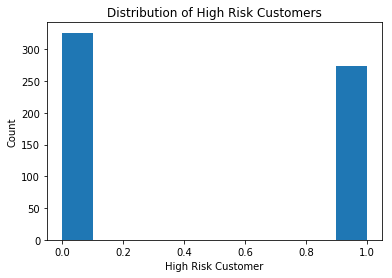

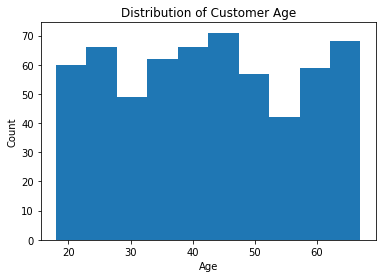

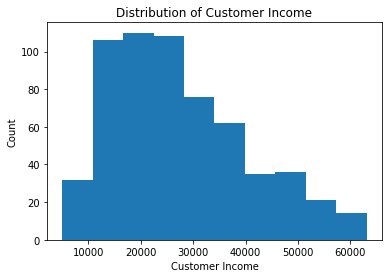

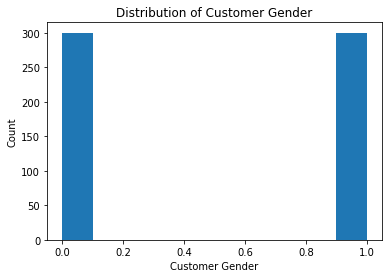

In [5]:
# exploratory analysis
import matplotlib.pyplot as plt
%matplotlib inline
# plot a histogram of the high risk customers
plt.hist(encoded_bank['pep'])
plt.title('Distribution of High Risk Customers')
plt.ylabel('Count')
plt.xlabel('High Risk Customer')
plt.show()

# plot a histogram of customer age
plt.hist(encoded_bank['age'])
plt.title('Distribution of Customer Age')
plt.ylabel('Count')
plt.xlabel('Age')
plt.show()

# plot a histogram of customer income
plt.hist(encoded_bank['income'])
plt.title('Distribution of Customer Income')
plt.ylabel('Count')
plt.xlabel('Customer Income')
plt.show()

# plot a histogram of customer gender
plt.hist(encoded_bank['sex'])
plt.title('Distribution of Customer Gender')
plt.ylabel('Count')
plt.xlabel('Customer Gender')
plt.show()

# Decision Tree Model

Decision trees sort data from the "root" to the "leaves" based on an attribute splitting the data into a classification. The split attribute is systematically chosen by which ever feature provides the best decision tree model based on the coefficient selected for the algorithm. 

I built a Decision Tree model with the entropy coefficient. The accuracy was in predicting high risk customers is about 81%. I generated a visualization of the decision tree to depict the structure of the model. Based on the visualization, it looks like the first split attribute is "income". Later on, I'll employ a Gradient Boosted Decision Tree to try and improve the results of this model.

In [6]:
# define decision tree parameters
nTrees = 100
max_depth = 5
min_node_size = 5
verbose = 0
learning_rate = 0.05

from sklearn.tree import DecisionTreeClassifier
# instantiate and fit decision tree classifier with the entropy coefficient
dec_tree_ent = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model = dec_tree_ent.fit(feat_train,target_train)

# obtain target prediction based on test features
y_predict_ent = model.predict(feat_test)

# print the accuracy score comparing predicted targets and actual test targets
from sklearn.metrics import accuracy_score
acc_ent = accuracy_score(target_test, y_predict_ent) * 100
print("Decision Tree Accuracy with entropy coefficient: {}%".format(acc_ent))

Decision Tree Accuracy with entropy coefficient: 80.83333333333333%


In [7]:
# generate visualization of decision tree
from sklearn import tree

dotfile1 = open("tennis_ent.dot", 'w')
tree.export_graphviz(dec_tree_ent, out_file = dotfile1, filled=True, rounded=True, feature_names = feats.columns)
dotfile1.close()

# convert the dot file to a png
from subprocess import check_call
check_call(['dot','-Tpng','tennis_ent.dot','-o','tennis_ent.png'])


0

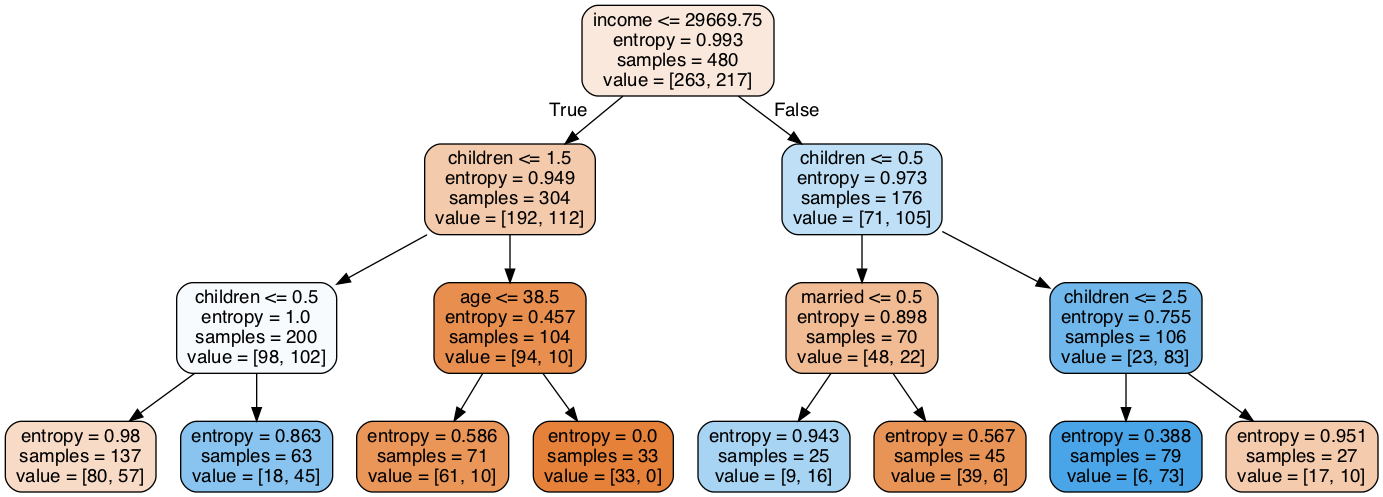

In [8]:
from IPython.display import Image
# print the decision tree visual
Image(filename='tennis_ent.png', width=500, height=500)

# Random Forest Classifier Model

Random forest models are an ensemble of multiple independently trained decision trees. Each tree is trained on different data (although they may share some of the training data) and by incorporating multiple trees, the approach typically perfoms better than individual trees. It's also helpful that the Random Forest model automatically performs feature selection and there is a lower chance of over fitting. The trade off when compared to decision trees is that random forest models are more difficult to interpret.

I built a Random Forest Classifier model with 100 trees, a max depth of 5 and a minimum node size of 5. I printed the importance of the features to provide an idea of which features are contributing the most to the predictions made by the model. The accuracy in predicting high risk customers from bank customer profiles is about 85%, which is a little bit better than the Decison Tree model. Next, I built a confusion matrix get an idea of the number of true positives, false positives, true negatives, and false negatives. Unfortunately, there were more high risk customers that were predicted as not high risk than the inverse. However, the accuracy score is still slightly better than the decision tree model. I'm curious to see if a Gradient Boosted Decision Tree model will improve the accuracy to be greater than 85%.

In [9]:
# build a random forest classifier model to predict high risk customer
# define the parameters of the random forest classifier model
nTrees = 100
max_depth = 5
min_node_size = 5
verbose = 0

from sklearn.ensemble import RandomForestClassifier
# instantiate and fit model to training data
clf = RandomForestClassifier(n_estimators=nTrees, max_depth=max_depth, random_state=0, verbose=verbose, min_samples_leaf=min_node_size)
clf.fit(feat_train, target_train)
# print the feature importance
print(clf.feature_importances_)


[0.14422181 0.01781435 0.25290153 0.09802187 0.27214437 0.01518242
 0.05699462 0.01784215 0.06329684 0.01208341 0.01748976 0.01356152
 0.01844536]


/Users/caseythayer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


In [10]:
import numpy as np
from sklearn.metrics import accuracy_score
# get a prediction from the test features
rfc_pred = clf.predict(feat_test)
# get the accuracy score by comparing the predicted target from test features to the actual test targets
rfc_score = accuracy_score(target_test, rfc_pred)
rfc_accuracy = rfc_score*100
# print the accuracy
print("Random Forest Classifier Accuracy: %.1f%%"%rfc_accuracy)

Random Forest Classifier Accuracy: 85.0%


In [11]:
# confusion matrix of random forest classifier
from sklearn.metrics import confusion_matrix
# create a confusion matrix to observe the true positives, false positives, true negatives, and false negatives
conf_matrix = pd.DataFrame(
                confusion_matrix(target_test, rfc_pred),
                columns=['Predicted Non High Risk Customer', 'Predicted High Risk Customer'],
                index=['True Non High Risk Customer', 'True High Risk Customer'])
# print the confusion matrix
conf_matrix

,Predicted Non High Risk Customer,Predicted High Risk Customer
True Non High Risk Customer,62,1
True High Risk Customer,17,40


# Gradient Boosted Decision Tree Model

Gradient boosted decision trees combine multiple decision trees, which on their own are considered "weak learners" to generate a strong learner through multiple iterations of building decision tree models. They operate by using the entire training data to fit the residuals of the target (in this case the high risk customer) and attempt to correct the errors of the each decision tree that preceeds the current one.

I instantiated the Gradient Boosted Decision Tree model with the same parameters that I used in the original Decision Tree model above. I printed the importance of each feature and saw that they were quite similar to the importance values generated with the Random Forest Classifier. The calculated accuracy of predicting a high risk customer based on bank profiles with the Gradient Boosted Decision Tree model is about 92%, which is better than the Decision Tree and the Random Forest Classifier models.


In [12]:
# define the gradient boosted decision tree parameters
nTrees = 100
max_depth = 5
min_node_size = 5
verbose = 0
learning_rate = 0.05

from sklearn.ensemble import GradientBoostingClassifier
# instantiate and fit gradient boosted decision tree
gbm_clf = GradientBoostingClassifier(n_estimators=nTrees, loss='deviance', learning_rate=learning_rate, max_depth=max_depth, \
                                    min_samples_leaf=min_node_size)
gbm_clf.fit(feat_train, target_train)

# print feature importance
print(gbm_clf.feature_importances_)



/Users/caseythayer/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.08090376 0.01091781 0.26469877 0.08091438 0.33478422 0.01285705
 0.05952736 0.01370315 0.12344825 0.00533759 0.00405262 0.00363244
 0.00522258]


In [13]:
# obtain gradient boosted decision tree target prediction based on test features
gbm_pred = gbm_clf.predict(feat_test)

# print accuracy by comparing the predicted targets and the actual targets from the test set
gbm_score = accuracy_score(target_test, gbm_pred)
gbm_accuracy = gbm_score*100
print("Gradient Boosted Decision Tree Classifier Accuracy: %.1f%%"%gbm_accuracy)

Gradient Boosted Decision Tree Classifier Accuracy: 91.7%


# Conclusions

In this assignment, I cleaned and prepared a dataset that contained attributes from a bank customer profiles. The goal is to identify high risk customers. To accomplish this I started by evaluating a simple decision tree model and then attempted to improve the results by employing a couple ensemble models, such as, Random Forest Classifier and a Gradient Boosted Decision Tree Model. My findings and observations for each step are detailed below.

Cleaning and preparing data:
* The data contained mostly YES/NO values and I converted all of these to binary values (including gender with MALE encoded as 0 and FEMALE encoded as 1)
* The dataset contained a feature called region that held 4 categorical variables. I one hot encoded this column to include these features in the model

Exploratory Data Analysis:
* I plotted the histograms of the following features to get an idea of how the data are distributed:
    * High Risk Customers: I checked the high risk customer data to ensure there was not a class imbalance that needed to be addressed in the analsyis. There were actually almost equal numbers of high risk customers and customers that were not considered high risk so this was not an issue
    * Age: The range of ages in this dataset is quite wide (around 18-70 years old) so it represents a variety of customers in different stages of their lives.
    * Income: The income data were distributed relatively normally with most customers earning around 20,000.
    * Sex: The sex of the customers appear to be evenly split between male and female customers.

Decision Tree model:
* The first model I built was a simple decision tree to predict high risk customers. The accuracy was about 81% which is not bad for a first try with a relatively "weak learner".
* I visualized the decision tree and was interested to see that the attribute that split the tree in the most optimal way was "income". This must be one of the more important features in the dataset for predicting high risk customers. I can see how this is the case because typically banks favor applications that are financially stable when deciding to approve the customer for loans or lines of credit. The next split is number of children which is tied into income in some ways because children are expensive and would impact where a majority of the income is spent.

Random Forest Model:
* The Random Forest Model employs multiple decision trees to improve the classification of a high risk customer. The accuracy was slightly improved from the decision tree model, at about 85%. 
* The importance of each feature was printed and similar to the decision tree visualization, we see that income has one of the higher feature importance values.
* I printed the confusion matrix for the results of running the model on the test data set. Unfortunately, there are more false positives than false negatives which in practice would be a conservative approach in that you'd be predicting high risk customers are not high risk more often than the other way around.

Gradient Boosted Decision Tree Model:
* Finally, I built a Gradient Boosted Decision Tree model improve the accuracy of the model further. This model iterates through multiple decision tree models building and learning after each iteration to try to reduce the error of the model the preceeds it. 
* The accuracy was better than both the Decision Tree Model and the Random Forest Classifier with an accuracy score of about 92%. This makes sense because incorporating the gradient boosting allows for the model to perform multiple iterations and optimize to find the best predictive model.

Final Conclusions:
* I would use the Gradient Boosted Decision Tree Model to predict high risk customers based on bank customer profiles because it has the highest accuracy and is capable of taking "weak learners" such as decision trees and combining them in a way that will optimize the model to generate the best prediction.